In [2]:
import collections
import numpy as np
import seaborn as sns
import os
import matplotlib.gridspec as gridspec
import pickle
from matplotlib import pyplot as plt
import matplotlib as mpl

pgf_with_custom_preamble = {
    "text.usetex": False,    # use inline math for ticks
    "pgf.rcfonts": False,   # don't setup fonts from rc parameters
}

def figsize(scale, height_ratio=1.0):
    fig_width_pt = 344.43306                        # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = height_ratio*fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "sans-serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 10,               # LaTeX default is 10pt font.
    "font.size": 10,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "figure.figsize": figsize(0.9),     # default fig size of 0.9 textwidth
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
    }

sns.set_style('ticks')
sns.set_context('poster')
sns.set_palette('dark', 40)

colors = sns.color_palette('dark', 40)

mpl.rcParams.update(pgf_with_latex)

# I make my own newfig and savefig functions
def newfig(width):
    plt.clf()
    fig = plt.figure(figsize=figsize(width))
    ax = fig.add_subplot(111)
    return fig, ax

def savefig(filename):
    plt.savefig('{}.pgf'.format(filename))
    plt.savefig('{}.pdf'.format(filename))

%matplotlib inline



from scipy import interpolate
#plt.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

In [44]:
plt.rcParams["axes.labelsize"]

10.0

In [45]:
%matplotlib inline

# PDI, Pn
## No water

In [47]:
cr = 0.001
scan_p0_1000_nowater = collections.defaultdict(list)
for f in sorted(os.listdir('scan_p_1000/no_water/')):
    if f.startswith('polstat'):
        k = float(f.split('_')[2])
        if k != cr:
            continue
        d = np.loadtxt(os.path.join('scan_p_1000/no_water/', f))
        header = open(os.path.join('scan_p_1000/no_water/', f)).readline().replace('#', '').split()
        d.dtype = [(x, 'float') for x in header]
        scan_p0_1000_nowater[k].append(d)

avg_no_water_pdi = []
p_vals = np.arange(0.0, 0.925, 0.01)
for l in scan_p0_1000_nowater[cr]:
    x = (l['cr']/2000)[:, 0]
    y = l['pdi'][:, 0]
    print(x.shape, y.shape, max(x))
    f = interpolate.interp1d(x, y)
    ynew = f(p_vals)
    avg_no_water_pdi.append(ynew)
    #plt.plot(l['cr']/2000, l['pdi'])
p_vals = np.array(p_vals)
std_no_water_pdi = np.std(np.array(avg_no_water_pdi), axis=0)
avg_no_water_pdi = np.average(avg_no_water_pdi, axis=0)

(9355,) (9355,) 0.925
(10001,) (10001,) 0.9275
(9882,) (9882,) 0.925
(9419,) (9419,) 0.925
(13990,) (13990,) 0.95
(8919,) (8919,) 0.925


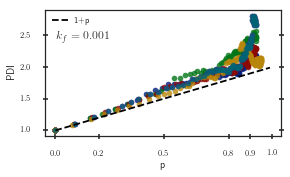

In [55]:
plt.rcParams['figure.figsize'] = figsize(0.9)
for l in scan_p0_1000_nowater[cr]:
    x = (l['cr']/2000.0)
    y = l['pdi']
    plt.plot(x, y, '.', markevery=100, alpha=0.8)
#plt.errorbar(p_vals, avg_no_water_pdi, std_no_water_pdi)
plt.plot(np.arange(0.0, 1.0, 0.01), 1+np.arange(0.0, 1.0, 0.01), linestyle='--', color='k', linewidth=1.8, label='1+p')
plt.annotate(r'$k_f={}$'.format(cr), xy=(0.05, 0.75), xycoords='axes fraction', fontsize=12)
plt.legend(loc=0)
plt.ylabel('PDI')
plt.xlabel('p')
plt.tight_layout()
plt.xticks([0.0, 0.2, 0.5, 0.8, 0.9, 1.0])
plt.yticks([1.0, 1.5, 2.0, 2.5])
plt.tick_params(size=5, direction='inout', right=True)
plt.savefig('result_graphics/pdi_no_water.pdf', dpi=200)

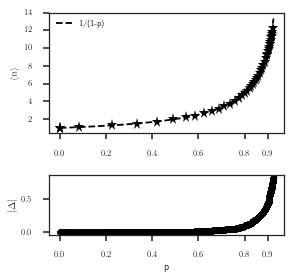

In [60]:
plt.rcParams['figure.figsize'] = figsize(0.9, height_ratio=1.5)
f, (a0, a1) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[2, 1]})

l = scan_p0_1000_nowater[0.001][0]
a0.plot(l['cr']/2000, l['pn'], '*', markevery=200, color='k')
a0.plot(l['cr']/2000, 1/(1-l['cr']/2000), label=r'1/(1-p)', linestyle='--', color='k', linewidth=1.8)
#a0.set_xlabel('p')
a0.set_ylabel(r'$\langle n \rangle$')
a0.legend()
a0.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 0.9])

l = scan_p0_1000_nowater[0.001][0]
theory_val = 1/(1-l['cr']/2000)
a1.plot(l['cr']/2000, np.abs(l['pn']-theory_val), linestyle='None', marker='.', color='k')
a1.set_xlabel('p')
a1.set_ylabel(r'$|\Delta|$')
a1.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 0.9])
f.tight_layout()
plt.savefig('result_graphics/average_n_no_water.pdf', dpi=200)

## Water

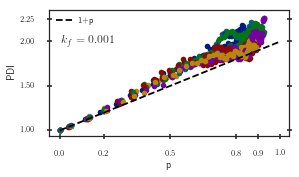

In [70]:
plt.rcParams['figure.figsize'] = figsize(0.9)
cr = 0.001
scan_p0_1000_water = collections.defaultdict(list)
for f in sorted(os.listdir('scan_p_1000/with_water/')):
    if f.startswith('polstat'):
        k = float(f.split('_')[2])
        if k != cr:
            continue
        d = np.loadtxt(os.path.join('scan_p_1000/with_water/', f))
        header = open(os.path.join('scan_p_1000/with_water/', f)).readline().replace('#', '').split()
        if len(header) < 8:
            continue
        d.dtype = [(x, 'float') for x in header]
        scan_p0_1000_water[k].append(d)
# avg_water_pdi = []
# p_vals = np.arange(0.0, 0.925, 0.01)
# for l in scan_p0_1000_water[0.001]:
#     x = (l['cr']/2000)[:, 0]
#     y = l['pdi'][:, 0]
#     print x.shape, y.shape, max(x)
#     f = interpolate.interp1d(x, y)
#     ynew = f(p_vals)
#     avg_water_pdi.append(ynew)
#     #plt.plot(l['cr']/2000, l['pdi'])
# p_vals = np.array(p_vals)
# std_water_pdi = np.std(np.array(avg_water_pdi), axis=0)
# avg_water_pdi = np.average(avg_water_pdi, axis=0)


for l in scan_p0_1000_water[cr]:
    x = (l['cr']/2000.0)
    y = l['pdi']
    plt.plot(x, y, '.', markevery=100)
plt.annotate(r'$k_f={}$'.format(cr), xy=(0.05, 0.72), xycoords='axes fraction', fontsize=12)
plt.plot(np.arange(0.0, 1.0, 0.01), 1+np.arange(0.0, 1.0, 0.01), linestyle='--', color='k', linewidth=1.8, label='1+p')
plt.ylabel('PDI')
plt.xlabel('p')
plt.legend(loc=0)
plt.tight_layout()
plt.xticks([0.0, 0.2, 0.5, 0.8, 0.9, 1.0])
plt.yticks([1.0, 1.5, 2.0, 2.25])
plt.tick_params(size=5, direction='inout', right=True)
plt.savefig('result_graphics/pdi_water.pdf', dpi=200)
#plt.savefig('pdi_water.png', dpi=200)

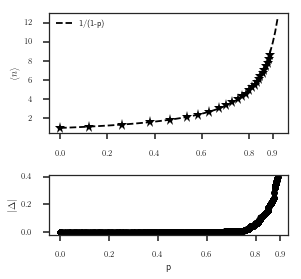

In [64]:
plt.rcParams['figure.figsize'] = figsize(0.9, height_ratio=1.5)
f, (a0, a1) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[2, 1]})

a0.plot(scan_p0_1000_water[0.001][1]['cr']/2000, scan_p0_1000_water[0.001][1]['pn'], '*', markevery=200, color='k')
a0.plot(np.arange(0, 0.925, 0.01), 1/(1-np.arange(0, 0.925, 0.01)), label=r'1/(1-p)', linestyle='--', color='k', linewidth=1.8)
a0.set_ylabel(r'$\langle n \rangle$')
a0.legend()
a0.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 0.9])

l = scan_p0_1000_water[0.001][1]
theory_val = 1/(1-l['cr']/2000)
a1.plot(l['cr']/2000, np.abs(l['pn']-theory_val), linestyle='None', marker='.', color='k')
a1.set_xlabel('p')
a1.set_ylabel(r'$|\Delta|$')
a1.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 0.9])
f.tight_layout()
plt.savefig('result_graphics/average_n_with_water.pdf', dpi=200)

## with water

In [65]:
plt.rcParams['figure.figsize'] = figsize(0.9)
cr = [0.1, 0.01, 0.001]
scan_p0_1000_water_rev = collections.defaultdict(list)
for f in sorted(os.listdir('scan_p_1000/with_water_rev/')):
    if f.startswith('polstat'):
        k = float(f.split('_')[2])
        if k not in cr:
            continue
        k2 = float(f.split('_')[3])
        if k2 != 0.01:
            continue
        d = np.loadtxt(os.path.join('scan_p_1000/with_water_rev/', f))
        header = open(os.path.join('scan_p_1000/with_water_rev/', f)).readline().replace('#', '').split()
        d.dtype = [(x, 'float') for x in header]
        scan_p0_1000_water_rev[k].append(d)
inter_water_rev_pdi = collections.defaultdict(list)
p_vals = {}
# for ss, max_cr in [(0.001, 0.32), (0.01, 0.61), (0.1, 0.86)]:
#     p_vals[ss] = np.arange(0.0, max_cr, 0.01)
# for cr in scan_p0_1000_water_rev:
#     for l in scan_p0_1000_water_rev[cr]:
#         x = (l['cr']/2000)[:, 0]
#         y = l['pdi'][:, 0]
#         f = interpolate.interp1d(x, y)
#         ynew = f(p_vals[cr])
#         inter_water_rev_pdi[cr].append(ynew)
# std_water_rev_pdi = {}
# avg_water_rev_pdi = {}
# for cr in inter_water_rev_pdi:
#     std_water_rev_pdi[cr] = np.std(np.array(inter_water_rev_pdi[cr]), axis=0)
#     avg_water_rev_pdi[cr] = np.average(inter_water_rev_pdi[cr], axis=0)

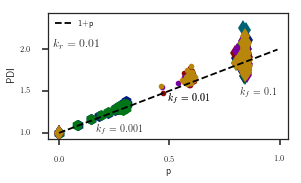

In [69]:
# plt.subplot(121)
markers = ['h', '.', 'd']
legend_lines = {}
for i, cr in enumerate(sorted(scan_p0_1000_water_rev)):
    for l in scan_p0_1000_water_rev[cr]:
        line, = plt.plot(
            l['cr']/2000.0, 
            l['pdi'], 
            '.', 
            markevery=100, 
            marker=markers[i])
        legend_lines[cr] = line
l, = plt.plot(np.arange(0.0, 1.0, 0.01), 1+np.arange(0.0, 1.0, 0.01), linestyle='--', color='k', linewidth=1.8, label='1+p')
plt.legend()
#     [legend_lines[cr] for cr in sorted(scan_p0_1000_water_rev)] + [l], 
#     list(map(r'$k_f={}$'.format, sorted(scan_p0_1000_water_rev.keys()))) + ['1+p'], loc=0)
plt.annotate(r'$k_f=0.001$', xy=(0.2, 0.05), xycoords='axes fraction')
plt.annotate(r'$k_f=0.01$', xy=(0.5, 0.3), xycoords='axes fraction')
plt.annotate(r'$k_f=0.01$', xy=(0.5, 0.3), xycoords='axes fraction')
plt.annotate(r'$k_f=0.1$', xy=(0.8, 0.35), xycoords='axes fraction')
plt.annotate(r'$k_r = 0.01$', xy=(0.02, 0.72), xycoords='axes fraction', fontsize=12)
plt.xlabel('p')
plt.ylabel('PDI')
plt.yticks([1.0, 1.5, 2.0])
plt.xticks([0.0, 0.5, 1.0])

plt.tight_layout()
plt.savefig('result_graphics/average_pdi_rev_water.pdf', dpi=200)

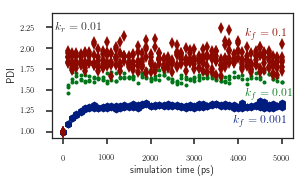

In [79]:
plt.rcParams['figure.figsize'] = figsize(0.9)
# plt.subplots_adjust(left=5, bottom=0, right=6, top=1, wspace=0, hspace=0)
plot_margin = 0.25

x0, x1, y0, y1 = plt.axis()


legend_lines = {}
for i, cr in enumerate(sorted(scan_p0_1000_water_rev)):
    for l in scan_p0_1000_water_rev[cr]:
        line, = plt.plot(
            l['pdi'], 
            '.', 
            markevery=100, 
            marker=markers[i],
            markersize=8.0,
            color=colors[i])
        legend_lines[cr] = line
plt.annotate(r'$k_r = 0.01$', xy=(0.01, 0.85), xycoords='axes fraction', fontsize=12)
# plt.legend(
#     [legend_lines[cr] for cr in sorted(scan_p0_1000_water_rev)], 
#     map(r'$k_f={}$'.format, sorted(scan_p0_1000_water_rev.keys())), loc=0)
plt.annotate(r'$k_f=0.001$', xy=(0.75, 0.1), xycoords='axes fraction', color=colors[0], fontsize=12)
plt.annotate(r'$k_f=0.01$', xy=(0.8, 0.32), xycoords='axes fraction', color=colors[1], fontsize=12)
plt.annotate(r'$k_f=0.1$', xy=(0.8, 0.8), xycoords='axes fraction', color=colors[2], fontsize=12)
plt.ylabel('PDI')
plt.xlabel('simulation time (ps)')
plt.tight_layout()
plt.savefig('result_graphics/average_pdi_t_rev_water.pdf', dpi=200, tight_layout=True)

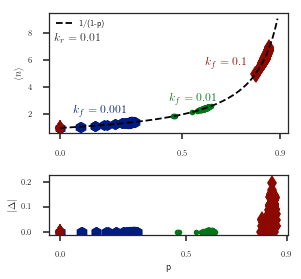

In [88]:
plt.rcParams['figure.figsize'] = figsize(0.9, height_ratio=1.5)
f, (a0, a1) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[2, 1]})
markers = ['h', '.', 'd']
legend_lines = {}
for i, cr in enumerate(sorted(scan_p0_1000_water_rev)):
    for l in scan_p0_1000_water_rev[cr]:
        line, = a0.plot(
            l['cr']/2000.0, 
            l['pn'], 
            '.', 
            markevery=100, 
            marker=markers[i],
            color=colors[i])
        legend_lines[cr] = line
l, = a0.plot(np.arange(0.0, 0.9, 0.01), 1.0/(1.0-np.arange(0.0, 0.9, 0.01)), 'k--', label='1/(1-p)', linewidth=1.8)
# a0.legend(
#     [legend_lines[cr] for cr in sorted(scan_p0_1000_water_rev)] + [l], 
#     list(map(r'$k_f={}$'.format, sorted(scan_p0_1000_water_rev.keys()))) + ['1/(1-p)'])
#a0.set_xlabel('p')
a0.set_ylabel(r'$\langle n \rangle$')
a0.set_xticks([0.0, 0.5, 0.9])
a0.annotate(r'$k_f=0.001$', xy=(0.1, 0.15), xycoords='axes fraction', color=colors[0], fontsize=12)
a0.annotate(r'$k_f=0.01$', xy=(0.5, 0.25), xycoords='axes fraction', color=colors[1], fontsize=12)
a0.annotate(r'$k_f=0.1$', xy=(0.65, 0.55), xycoords='axes fraction', color=colors[2], fontsize=12)
a0.annotate(r'$k_r = 0.01$', xy=(0.02, 0.75), xycoords='axes fraction', fontsize=12)
a0.legend(loc=0)

for i, cr in enumerate(sorted(scan_p0_1000_water_rev)):
    for l in scan_p0_1000_water_rev[cr]:
        theory_val = 1/(1-l['cr']/2000)
        a1.plot(l['cr']/2000, np.abs(l['pn']-theory_val), color=colors[i], linestyle='None', marker=markers[i], markevery=100)
a1.set_xlabel('p')
a1.set_ylabel(r'$|\Delta|$')
a1.set_xticks([0.0, 0.5, 0.9])

f.tight_layout()
f.savefig('result_graphics/average_pn_rev_water.pdf', dpi=200, tight_layout=True)

# Loops

In [4]:
import pickle
with open('scan_p_1000/no_water/loops.pck', 'rb') as ib:
    loops_no_water = pickle.load(ib)
    loops_no_water = [l for x in loops_no_water for l in x]    
#     print np.average(loops_no_water), np.std(loops_no_water), np.min(loops_no_water), np.max(loops_no_water), np.sum(loops_no_water)
with open('scan_p_1000/with_water/loops.pck', 'rb') as ib:
    loops_water = pickle.load(ib)
    loops_water = [l for x in loops_water for l in x]
#     print np.average(loops_water), np.std(loops_water), np.min(loops_water), np.max(loops_water)
with open('scan_p_1000/with_water_rev/old/loops.pck', 'rb') as ib:
    loops_rev_water = pickle.load(ib)
    loops_rev_water = [l for x in loops_rev_water for l in x]
#     print np.average(loops_rev_water), np.std(loops_rev_water), np.min(loops_rev_water), np.max(loops_rev_water)

with open('scan_p_1000/with_water_rev/old/loops_0.1_0.01.pck', 'rb') as ib:
    loops_rev_water_01 = pickle.load(ib)
    loops_rev_water_01 = [l for x in loops_rev_water_01 for l in x]
#     print np.average(loops_rev_water_01), np.std(loops_rev_water_01), np.min(loops_rev_water_01), np.max(loops_rev_water_01)
    
with open('scan_p_1000/with_water_rev/old/loops_0.01_0.01.pck', 'rb') as ib:
    loops_rev_water_001 = pickle.load(ib)
    loops_rev_water_001 = [l for x in loops_rev_water_001 for l in x]
#     print np.average(loops_rev_water_001), np.std(loops_rev_water_001), np.min(loops_rev_water_001), np.max(loops_rev_water_001)
    
with open('scan_p_1000/with_water_rev/old/loops_0.001_0.01.pck', 'rb') as ib:
    loops_rev_water_0001 = pickle.load(ib)
#     print loops_rev_water_0001
    loops_rev_water_0001 = [l for x in loops_rev_water_0001 for l in x]
#     print np.average(loops_rev_water_0001), np.std(loops_rev_water_0001), np.min(loops_rev_water_0001), np.max(loops_rev_water_0001)

145.0
99.0
3.0
8.0


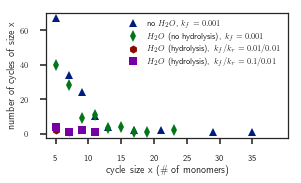

In [6]:
plt.rcParams['figure.figsize'] = figsize(0.9)
plt.rc('text', usetex=True)
n, x = np.histogram(loops_no_water,  bins=range(40))
n = np.asarray(n, dtype=float)
n[n==0.0] = np.nan
plt.plot(x[1:]-0.5, n, '^', label=r'no $H_2O$, $k_f=0.001$', markersize=8)
print(np.nansum(n))

n, x = np.histogram(loops_water, bins=range(40))
n = np.asarray(n, dtype=float)
n[n==0.0] = np.nan
plt.plot(x[1:]-0.5, n, 'd', label=r'$H_2O$ (no hydrolysis), $k_f=0.001$', markersize=8)
print(np.nansum(n))

n, x = np.histogram(loops_rev_water_001,  bins=range(40))
n = np.asarray(n, dtype=float)
n[n==0.0] = np.nan
plt.plot(x[1:]-0.5, n, 'h', label=r'$H_2O$ (hydrolysis), $k_f/k_r=0.01/0.01$', markersize=8)
print(np.nansum(n))

n, x = np.histogram(loops_rev_water_01,  bins=range(40))
n = np.asarray(n, dtype=float)
n[n==0.0] = np.nan
plt.plot(x[1:]-0.5, n, 's', label=r'$H_2O$ (hydrolysis), $k_f/k_r=0.1/0.01$', markersize=8)
print(np.nansum(n))

xticks = np.array(list(range(0, 40, 5)))
plt.xticks(xticks-0.5, xticks)
plt.xlim([3, 40])

plt.legend(loc=0)
plt.xlabel('cycle size x (\# of monomers)')
plt.ylabel('number of cycles of size x')
#plt.annotate(r'$k_r=0.01$', xy=(0.57, 0.64), xycoords='axes fraction', fontsize=16)
plt.tight_layout()
plt.savefig('result_graphics/loop_size.pdf', tight_layout=True)

In [13]:
with open('scan_p_1000/no_water/loops.pck', 'rb') as ib:
    loops_no_water = pickle.load(ib)
    print(loops_no_water)
    #loops_no_water = [l for x in loops_no_water for l in x]    

[[10, 4, 6, 8, 4], [8, 4, 8, 10, 4, 8, 4, 4], [8, 20, 6, 6, 6, 6, 4, 6, 4, 4, 8], [4, 6, 6, 4], [8, 4, 6, 8, 4, 4, 4, 4, 6, 4, 4, 8, 4], [4, 6, 4, 4, 6, 6, 10, 4, 6, 4], [4, 4, 4, 12, 16, 4, 4, 4, 4, 4], [10, 8, 10, 4, 10, 4], [4, 34, 4, 12, 8, 6, 4, 10, 8, 4, 4], [28, 8, 6, 8, 4], [6, 8, 10, 8, 8, 6], [10, 8, 4, 4, 6, 6, 4], [16, 6, 6, 8, 6, 4, 6, 4, 4], [4, 6, 6, 4], [8, 8, 4, 4, 12, 4], [4, 6, 10, 4, 4, 4], [6, 4, 4, 4], [4, 8, 8, 4], [12, 4, 8, 6, 4, 4], [6, 20, 6, 6, 6, 4, 4, 6, 4, 4]]
